In [87]:
import os
import pandas as pd
import subprocess

# # === Path to your main folder ===
# base_path = r"C:/Users/Admin/Desktop/special_child_project/special_child_dataset"

# # === List to store all data ===
# data = []

# # === Walk through all subfolders (handles folders inside folders too) ===
# for root, dirs, files in os.walk(base_path):
#     for file_name in files:
#         if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#             # Child name is the folder name containing the image
#             child_name = os.path.basename(os.path.dirname(os.path.join(root, file_name)))
            
#             # Full path of image
#             full_path = os.path.join(root, file_name)
            
#             # Add all info
#             data.append({
#                 "Child_Name": child_name,
#                 "Image_File": file_name,
#                 "Full_Path": full_path,
#                 "Age": "",
#                 "Class": "",
#                 "Writing_Type": "",
#                 "Notes": ""
#             })

# # === Create a DataFrame ===
# df = pd.DataFrame(data)

# # === Save Excel inside the same folder as your dataset ===
# output_path = os.path.join(base_path, "children_writing_data.xlsx")
# df.to_excel(output_path, index=False)

# print("✅ Excel file created successfully!")
# print("📂 File saved at:", output_path)

# # === Automatically open the Excel file ===
# try:
#     subprocess.Popen(["explorer", os.path.abspath(output_path)])
# except Exception as e:
#     print("⚠️ Could not open file automatically:", e)


In [88]:
import tensorflow as tf
from keras.utils import to_categorical

# Read Excel file
df = pd.read_excel("C:/Users/Admin/Desktop/special_child_project/children_writing_data_final.xlsx")

# Display first few rows to verify
print(df.head())


   S.No. Child_Name     Image_File  \
0      1       Aaru     banan.jpeg   
1      2       Aaru      bike.jpeg   
2      3       Aaru     black.jpeg   
3      4       Aaru  blue (2).jpeg   
4      5       Aaru      blue.jpeg   

                                           Full_Path Disability  IQ Level  \
0  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
1  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
2  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
3  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
4  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   

   percentage of disability  age   Label  
0                        75   10  BANANA  
1                        75   10    BIKE  
2                        75   10   BLACK  
3                        75   10   BLUE   
4                        75   10    BLUE  


In [89]:
import cv2
# Read your Excel
df = pd.read_excel("C:/Users/Admin/Desktop/special_child_project/children_writing_data_final.xlsx")

# Fix the paths (replace \ with /)
df["Full_Path"] = df["Full_Path"].str.replace("\\", "/", regex=False)

# Now test one image
path = df["Full_Path"].iloc[0]
print("Fixed path:", path)
print("Exists?", os.path.exists(path))

img = cv2.imread(path)
print("Loaded image:", img is not None)

Fixed path: C:/Users/Admin/Desktop/special_child_project/special_child_dataset/Aaru/banan.jpeg
Exists? True
Loaded image: True


In [90]:
import numpy as np
IMG_SIZE = (128, 128)
images, labels = [], []

for idx, row in df.iterrows():
    path = row["Full_Path"]
    label = row["Label"]
    
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Could not read {path}")
        continue
    
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # normalize
    
    images.append(img)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

In [91]:
print(X.shape, y.shape)

(408, 128, 128, 3) (408,)


In [92]:
print(df.head())

   S.No. Child_Name     Image_File  \
0      1       Aaru     banan.jpeg   
1      2       Aaru      bike.jpeg   
2      3       Aaru     black.jpeg   
3      4       Aaru  blue (2).jpeg   
4      5       Aaru      blue.jpeg   

                                           Full_Path Disability  IQ Level  \
0  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
1  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
2  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
3  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   
4  C:/Users/Admin/Desktop/special_child_project/s...         MR        42   

   percentage of disability  age   Label  
0                        75   10  BANANA  
1                        75   10    BIKE  
2                        75   10   BLACK  
3                        75   10   BLUE   
4                        75   10    BLUE  


In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# For multi-class CNN classification
y_categorical = to_categorical(y_encoded)

print(le.classes_)  # check class names

['ANSHUL' 'ANSHUL ' 'ANUJ' 'APPLE' 'APPLE ' 'ASHOK' 'BANANA' 'BAT' 'BEAR'
 'BIKE' 'BLACK' 'BLUE' 'BLUE ' 'BUS' 'CAR' 'CAR ' 'CARRORT' 'CARROT'
 'CHEST' 'CHIRAG' 'CHIRAG ' 'CIRCLE' 'COW' 'CRICKET' 'CROW' 'DEER'
 'DOCTOR' 'DOG' 'EAR' 'EARS' 'ELEPHANT' 'EYE' 'EYES' 'EYES ' 'FOUR' 'FOX'
 'FRIDAY' 'GOAT' 'GRAPES' 'GREEN' 'GUAVA' 'HAIR' 'HAND' 'HEAR' 'HEN'
 'HOLI' 'IS' 'ISHITA' 'JEEP' 'JITENDER' 'LEG' 'LION' 'LIPS' 'LIPS '
 'LOTUS' 'LUDO' 'MANGO' 'MANGO ' 'MANOJ' 'MARIGOLD' 'MAT' 'MONDAY'
 'MONSOON' 'MOUTH' 'NAME' 'NAN' 'NOSE' 'NOSE ' 'ONION' 'ORANGE' 'ORANGE '
 'OWL' 'OX' 'PARROT' 'PARUL' 'PEA' 'PEAS' 'PINK' 'PINK ' 'PLEASE' 'POLICE'
 'POTATO' 'POTATO ' 'RADISH' 'RAIN' 'RECTANGLE' 'RED' 'ROSE' 'SATURDAY'
 'SCOOTY' 'SORRY' 'SQUARE' 'SUDESH' 'SUDHIR' 'SUMMAR' 'SUMMER' 'SUNDAY'
 'SUNFLOWER' 'SWAN' 'TAILOR' 'TEEJ' 'THURSDAY' 'TIGER' 'TOMATO' 'TRAIN'
 'TRUCK' 'TRUCK ' 'TUESDAY' 'TULIP' 'TWO' 'VAN' 'WEDNESDAY' 'WHITE'
 'YELLOW']


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

In [95]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.4),

    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Admin\Desktop\special_child_project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 114)            │         7,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,874 (3.18 MB)

 Trainable params: 833,874 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rescale=1./1., rotation_range=20, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

In [108]:
datagen.fit(X_train)

In [109]:
1e-4

0.0001

In [110]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AlphaDropout
# from keras.initializers import lecun_normal
# from keras.callbacks import EarlyStopping
# # from keras.callbacks import ReduceLROnPlateau

# # lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# import keras

# # --- Model Definition ---
# model = Sequential([
#     Conv2D(16, (3,3), activation='selu', kernel_initializer='lecun_normal', input_shape=(128,128,3)),
#     MaxPooling2D(2,2),

#     Conv2D(32, (3,3), activation='selu', kernel_initializer='lecun_normal'),
#     MaxPooling2D(2,2),

#     Conv2D(64, (3,3), activation='selu', kernel_initializer='lecun_normal'),
#     MaxPooling2D(2,2),

#     Flatten(),

#     Dense(64, activation='selu', kernel_initializer='lecun_normal'),
#     AlphaDropout(0.3),

#     Dense(len(le.classes_), activation='softmax')
# ])
# # --- Compile ---
# model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# # --- Early Stopping ---
# # early_stop = EarlyStopping(
# #     monitor='val_loss',
# #     patience=10,              # stop after 10 epochs with no improvement
# #     restore_best_weights=True
# # )

# # --- Train ---
# history = model.fit(
#     datagen.flow(X_train, y_train, batch_size=32),
#     validation_data=(X_test, y_test),
#     epochs=1000,
#     batch_size=8,
# )

# # --- Summary ---
# model.summary()


In [111]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze pre-trained layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(114, activation='softmax')  # your 100 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │     5,243,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 114)            │        29,298 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,530,418 (28.73 MB)

 Trainable params: 5,272,434 (20.11 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [112]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    validation_data=(X_test, y_test),
                    epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 413ms/step - accuracy: 0.0153 - loss: 5.5826 - val_accuracy: 0.0244 - val_loss: 4.6892
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.0429 - loss: 4.6185 - val_accuracy: 0.0488 - val_loss: 4.5833
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.0491 - loss: 4.5656 - val_accuracy: 0.0976 - val_loss: 4.5462
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.0890 - loss: 4.4774 - val_accuracy: 0.0488 - val_loss: 4.5172
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 284ms/step - accuracy: 0.0675 - loss: 4.3702 - val_accuracy: 0.0610 - val_loss: 4.4434
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.0859 - loss: 4.2803 - val_accuracy: 0.0610 - val_loss: 4.5007
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.0767 - loss: 4.2479 - val_accuracy: 0.0732 - val_loss: 4.3754
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.0706 - loss: 4.1748 - val_acc

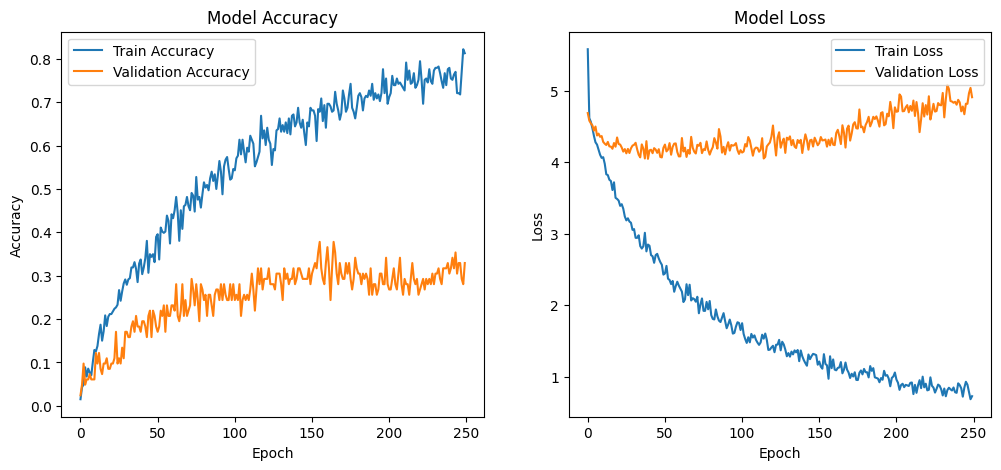

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [114]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"❌ Test Loss: {test_loss:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.3293 - loss: 4.9111
✅ Test Accuracy: 0.33
❌ Test Loss: 4.91


In [115]:
import numpy as np

predictions = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

true_labels = le.inverse_transform(y_true)
pred_labels = le.inverse_transform(y_pred)


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020DEC916D40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 804ms/step


In [116]:
for i in range(10):
    print(f"Image {i+1}: True → {true_labels[i]} | Predicted → {pred_labels[i]}")


Image 1: True → PINK  | Predicted → PINK
Image 2: True → POLICE | Predicted → DOCTOR
Image 3: True → GUAVA | Predicted → BANANA
Image 4: True → ANSHUL  | Predicted → ANSHUL
Image 5: True → APPLE | Predicted → APPLE 
Image 6: True → THURSDAY | Predicted → ANSHUL
Image 7: True → EYE | Predicted → BUS
Image 8: True → NOSE | Predicted → NOSE
Image 9: True → PARUL | Predicted → ASHOK
Image 10: True → ONION | Predicted → HAND


In [117]:
for i in range(5):
    probs = list(zip(le.classes_, predictions[i]))
    probs_sorted = sorted(probs, key=lambda x: x[1], reverse=True)
    print(f"\nImage {i+1}:")
    for label, prob in probs_sorted[:3]:
        print(f"{label}: {prob:.2f}")



Image 1:
PINK: 0.74
BIKE: 0.04
PINK : 0.02

Image 2:
DOCTOR: 0.37
RAIN: 0.20
PINK: 0.13

Image 3:
BANANA: 0.28
PINK: 0.10
GUAVA: 0.09

Image 4:
ANSHUL: 0.99
ANSHUL : 0.00
RAIN: 0.00

Image 5:
APPLE : 0.85
PINK: 0.05
APPLE: 0.03


In [118]:
top_label = le.classes_[np.argmax(predictions[i])]
top_confidence = np.max(predictions[i])

print(f"Predicted word: {top_label} (confidence: {top_confidence:.2f})")


Predicted word: APPLE  (confidence: 0.85)


In [73]:
from collections import defaultdict

mistake_counts = defaultdict(lambda: defaultdict(int))

for i in range(len(X_test)):
    true_word = le.inverse_transform([np.argmax(y_test[i])])[0]
    predicted_word = le.inverse_transform([np.argmax(predictions[i])])[0]
    child = df.loc[i, "Child_Name"]

    for t, p in zip(true_word, predicted_word):
        if t != p:
            mistake_counts[child][t] += 1


In [74]:
print(dict(mistake_counts))

{'Aaru': defaultdict(<class 'int'>, {'P': 9, 'I': 7, 'N': 11, 'K': 3, ' ': 1, 'O': 11, 'L': 9, 'C': 5, 'E': 14, 'G': 5, 'U': 6, 'A': 12, 'V': 1, 'T': 5, 'H': 3, 'R': 9, 'Y': 1, 'S': 3, 'D': 4, 'W': 1, 'B': 2}), 'Akash': defaultdict(<class 'int'>, {'B': 4, 'A': 15, 'N': 7, 'D': 1, 'O': 8, 'C': 3, 'T': 3, 'R': 6, 'E': 5, 'M': 4, 'I': 5, 'G': 5, 'H': 2, 'L': 1, 'K': 2, 'U': 2, 'V': 1, 'P': 3, 'S': 1}), 'chirag': defaultdict(<class 'int'>, {'M': 2, 'A': 16, 'N': 8, 'G': 4, 'O': 11, 'R': 11, 'E': 11, 'C': 7, 'I': 6, 'L': 5, 'T': 8, 'U': 7, 'P': 6, 'S': 5, 'K': 2, 'H': 4, 'D': 5, 'Y': 1, 'W': 1, 'Q': 1, ' ': 1, 'B': 1}), 'Gagan': defaultdict(<class 'int'>, {'T': 1, 'U': 1, 'L': 1, 'I': 1, 'P': 1, 'F': 1, 'O': 1, 'X': 1})}


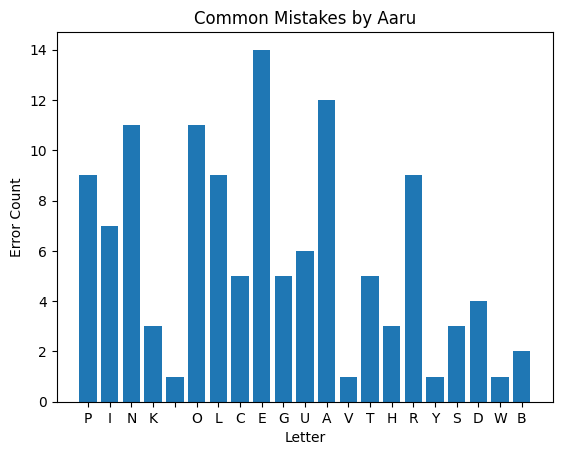

In [119]:
import matplotlib.pyplot as plt

child = "Aaru"
letters = list(mistake_counts[child].keys())
errors = list(mistake_counts[child].values())

plt.bar(letters, errors)
plt.title(f"Common Mistakes by {child}")
plt.xlabel("Letter")
plt.ylabel("Error Count")
plt.show()


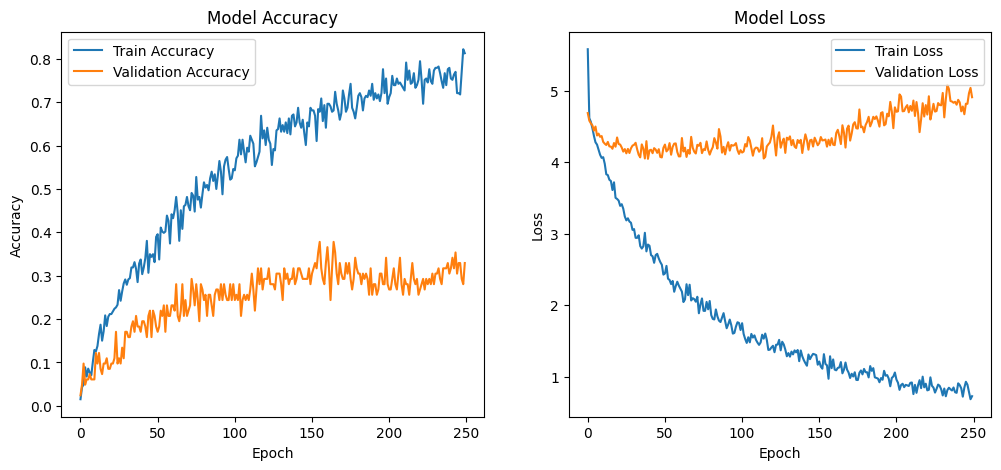

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [125]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"❌ Test Loss: {test_loss:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.3293 - loss: 4.9111
✅ Test Accuracy: 0.33
❌ Test Loss: 4.91


In [128]:
import numpy as np

predictions = model.predict(X_train)
y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(predictions, axis=1)

true_labels = le.inverse_transform(y_true)
pred_labels = le.inverse_transform(y_pred)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step


In [129]:
for i in range(10):
    print(f"Image {i+1}: True → {true_labels[i]} | Predicted → {pred_labels[i]}")


Image 1: True → LION | Predicted → LION
Image 2: True → BLUE  | Predicted → BLUE 
Image 3: True → NOSE  | Predicted → NOSE 
Image 4: True → BANANA | Predicted → BANANA
Image 5: True → APPLE | Predicted → APPLE
Image 6: True → PINK | Predicted → PINK
Image 7: True → FRIDAY | Predicted → MONDAY
Image 8: True → BLACK | Predicted → BLACK
Image 9: True → DOCTOR | Predicted → DOCTOR
Image 10: True → COW | Predicted → COW


c:\Users\Admin\Desktop\special_child_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\Admin\Desktop\special_child_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\Admin\Desktop\special_child_project\.venv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\Admin\Desktop\special_child_pr

              precision    recall  f1-score   support

      ANSHUL       0.17      0.33      0.22         3
     ANSHUL        0.00      0.00      0.00         2
       APPLE       0.00      0.00      0.00         3
      APPLE        0.00      0.00      0.00         0
       ASHOK       0.00      0.00      0.00         0
      BANANA       0.00      0.00      0.00         1
        BEAR       0.50      1.00      0.67         1
       BLACK       1.00      0.67      0.80         3
        BLUE       1.00      1.00      1.00         1
         BUS       0.20      1.00      0.33         1
         CAR       0.33      0.50      0.40         2
        CAR        0.00      0.00      0.00         1
      CARROT       0.00      0.00      0.00         0
     CHIRAG        1.00      0.33      0.50         3
      CIRCLE       0.00      0.00      0.00         1
         COW       0.00      0.00      0.00         1
        DEER       0.00      0.00      0.00         1
      DOCTOR       0.00    

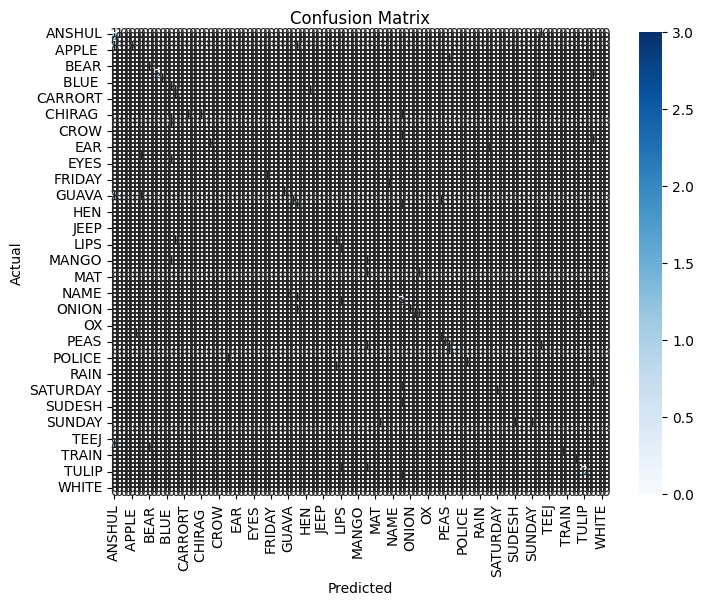

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

print(classification_report(true_labels, pred_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=le.classes_)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [35]:
for i in range(5):
    probs = list(zip(le.classes_, predictions[i]))
    probs_sorted = sorted(probs, key=lambda x: x[1], reverse=True)
    print(f"\nImage {i+1}:")
    for label, prob in probs_sorted[:3]:
        print(f"{label}: {prob:.2f}")



Image 1:
ANSHUL: 0.03
PINK: 0.03
BANANA: 0.02

Image 2:
ANSHUL: 0.03
PINK: 0.03
BLUE: 0.03

Image 3:
ANSHUL: 0.03
PINK: 0.03
BANANA: 0.03

Image 4:
ANSHUL: 0.03
PINK: 0.03
HAND: 0.03

Image 5:
ANSHUL: 0.03
PINK: 0.03
BANANA: 0.03
